In [1]:
import pandas as pd
import matplotlib.pyplot as plot
import plotnine as p9

/Users/JosephOBrien/psi4conda/envs/p4devpy3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:278: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
surv = pd.read_csv('data/surveys.csv', keep_default_na=False, na_values=[""])
spec = pd.read_csv('data/species.csv', keep_default_na=False, na_values=[""])
surv.columns


Index(['record_id', 'month', 'day', 'year', 'plot_id', 'species_id', 'sex',
       'hindfoot_length', 'weight'],
      dtype='object')

In [3]:
spec.columns

Index(['species_id', 'genus', 'species', 'taxa'], dtype='object')

In [24]:
merged = pd.merge(left = surv, right = spec, left_on='species_id', right_on='species_id')
merged

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,genus,species,taxa
0,3,7,16,1977,2,DM,F,37.0,NaN,Dipodomys,merriami,Rodent
1,4,7,16,1977,7,DM,M,36.0,NaN,Dipodomys,merriami,Rodent
2,5,7,16,1977,3,DM,M,35.0,NaN,Dipodomys,merriami,Rodent
3,8,7,16,1977,1,DM,M,37.0,NaN,Dipodomys,merriami,Rodent
4,9,7,16,1977,1,DM,F,34.0,NaN,Dipodomys,merriami,Rodent
5,12,7,16,1977,7,DM,M,38.0,NaN,Dipodomys,merriami,Rodent
6,13,7,16,1977,3,DM,M,35.0,NaN,Dipodomys,merriami,Rodent
7,14,7,16,1977,8,DM,NaN,NaN,NaN,Dipodomys,merriami,Rodent
8,15,7,16,1977,6,DM,F,36.0,NaN,Dipodomys,merriami,Rodent
9,16,7,16,1977,4,DM,F,36.0,NaN,Dipodomys,merriami,Rodent


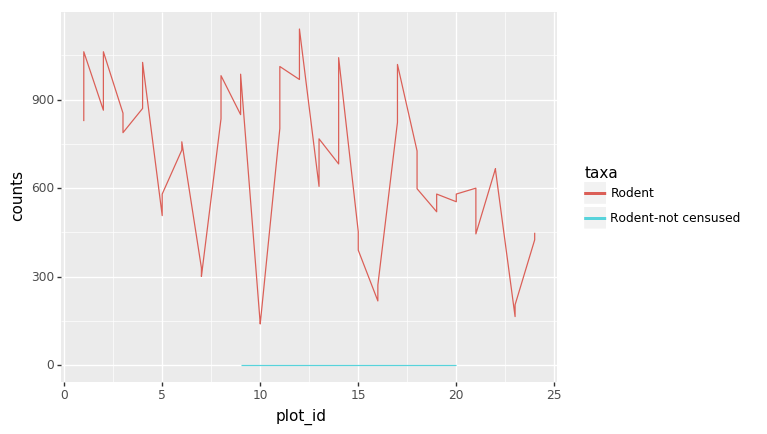

<ggplot: (-9223372036554521042)>

In [47]:
my_stuff = merged.groupby(['plot_id', 'taxa','sex'])['taxa'].count()
(p9.ggplot(data=my_stuff.reset_index(name='counts'),
           mapping=p9.aes(x='plot_id',
                          y='counts',
                          color='taxa'))
    + p9.geom_line()
)